In [1]:
%matplotlib inline
%load_ext fireducks.pandas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("./datasets/second-half-2020.csv", index_col=0)
df["day"] = pd.to_datetime(df["day"], format="%Y-%m-%d")
#df.insert(1,"month",[t.month for t in df["day"]])
df.head()

,day,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,estimatedMinutesWatched,...,subscribersGained,subscribersLost,estimatedRevenue,estimatedAdRevenue,grossRevenue,estimatedRedPartnerRevenue,monetizedPlaybacks,playbackBasedCpm,adImpressions,cpm
0,2020-07-01,571,23,1,20,0,6,2,2,1546,...,7,1,0.0,0.0,0.0,0.0,0,0.0,0,0.0
1,2020-07-02,488,7,5,25,0,8,2,1,1068,...,8,1,0.0,0.0,0.0,0.0,0,0.0,0,0.0
2,2020-07-03,415,10,0,2,0,3,0,2,932,...,4,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
3,2020-07-04,490,21,8,12,0,3,0,0,1204,...,4,1,0.0,0.0,0.0,0.0,0,0.0,0,0.0
4,2020-07-05,599,42,8,15,0,8,2,3,1585,...,6,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0


In [6]:
def linear_regression(data):
    x=data[:,0].reshape((-1,1))
    y=data[:,1]
    regr = LinearRegression()
    regr.fit(x,y)
    return regr.predict(x)

In [4]:
data = df[["views","redViews"]].values #con esto convertimos los datos en un arreglo de numpy
data

array([[ 571,   23],
       [ 488,    7],
       [ 415,   10],
       [ 490,   21],
       [ 599,   42],
       [ 485,   32],
       [ 414,   28],
       [ 564,   22],
       [ 620,   20],
       [ 528,   20],
       [ 652,   44],
       [ 631,   18],
       [ 502,   15],
       [ 600,   19],
       [ 553,   22],
       [ 653,   13],
       [ 779,   37],
       [ 507,   22],
       [ 493,   20],
       [ 664,   28],
       [ 741,   24],
       [ 714,   50],
       [ 717,   51],
       [ 607,   42],
       [ 548,   44],
       [ 546,   32],
       [ 781,   44],
       [ 853,   43],
       [ 629,   69],
       [ 725,   36],
       [ 899,   41],
       [ 673,   30],
       [ 638,   21],
       [ 851,   27],
       [ 709,   22],
       [ 669,   20],
       [ 661,   36],
       [ 689,   38],
       [ 620,   29],
       [ 744,   31],
       [ 714,   34],
       [ 741,   31],
       [ 668,   27],
       [ 779,   23],
       [ 695,   42],
       [ 590,   49],
       [ 710,   70],
       [1232,

In [5]:
data[:,1]

array([ 23,   7,  10,  21,  42,  32,  28,  22,  20,  20,  44,  18,  15,
        19,  22,  13,  37,  22,  20,  28,  24,  50,  51,  42,  44,  32,
        44,  43,  69,  36,  41,  30,  21,  27,  22,  20,  36,  38,  29,
        31,  34,  31,  27,  23,  42,  49,  70,  85,  32,  52,  30,  27,
        40,  19,  36,  37,  40,  30,  46,  26,  48,  50,  18,  80,  66,
        37,  27,  40,  25,  23,  80,  72,  35,  28,  75,  59,  36,  47,
        40,  43,  44,  74,  74,  54,  87,  56,  42,  70,  80,  65,  52,
        82,  28,  69,  52, 121, 106,  82,  40,  61,  76,  77,  76,  52,
        88,  64,  58,  50,  81,  54, 117,  60,  79,  60,  60,  62,  33,
        64,  31,  52,  91,  54,  60, 111,  80, 156,  94,  75,  70,  99,
        37,  93,  49,  64,  67, 121,  35,  47,  51,  59,  89,  83,  40,
        29,  57,  54,  57,  76,  37,  23,  65,  65,  42,  85,  53,  53,
        67,  65,  41,  62,  48,  64,  59,  73,  69,  74,  57,  34,  53,
        65,  82,  87,  67, 104,  54,  58,  21,  28,  85,  86, 11

/home/master/.virtualenvs/Pandas-Carberra-nubz/lib/python3.12/site-packages/fireducks/pandas/generic.py:775: UserWarning: df2 = df1.copy(deep=False) might not work, when changes made in the data values of 'df2' is expected to be reflected in 'df1'. REF: https://fireducks-dev.github.io/docs/user-guide/04-compatibility/#copydeep--false
  warnings.warn(
/home/master/.virtualenvs/Pandas-Carberra-nubz/lib/python3.12/site-packages/fireducks/pandas/generic.py:775: UserWarning: df2 = df1.copy(deep=False) might not work, when changes made in the data values of 'df2' is expected to be reflected in 'df1'. REF: https://fireducks-dev.github.io/docs/user-guide/04-compatibility/#copydeep--false
  warnings.warn(
/tmp/ipykernel_473473/3533247824.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


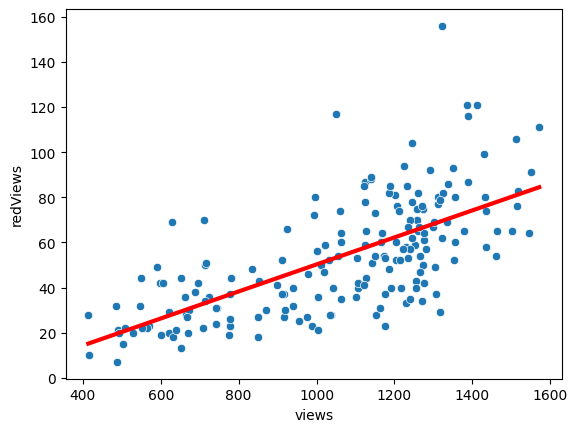

In [7]:
data[:0].reshape((-1,1)) #con esto reacomodamos los datos para que queden en una sola columna
pred =linear_regression(data)
fig = plt.figure()
sns.scatterplot(x="views",y="redViews",data=df)
sns.lineplot(x=df["views"],y=pred, color="red",lw=3)
fig.show()

/home/master/.virtualenvs/Pandas-Carberra-nubz/lib/python3.12/site-packages/fireducks/pandas/generic.py:775: UserWarning: df2 = df1.copy(deep=False) might not work, when changes made in the data values of 'df2' is expected to be reflected in 'df1'. REF: https://fireducks-dev.github.io/docs/user-guide/04-compatibility/#copydeep--false
  warnings.warn(
/home/master/.virtualenvs/Pandas-Carberra-nubz/lib/python3.12/site-packages/fireducks/pandas/generic.py:775: UserWarning: df2 = df1.copy(deep=False) might not work, when changes made in the data values of 'df2' is expected to be reflected in 'df1'. REF: https://fireducks-dev.github.io/docs/user-guide/04-compatibility/#copydeep--false
  warnings.warn(
/tmp/ipykernel_473473/2198939793.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


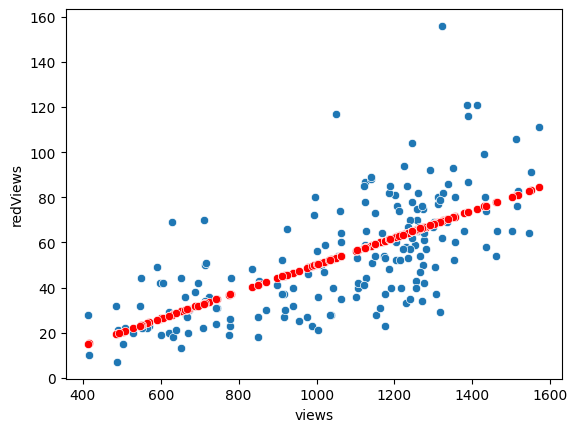

In [9]:
data[:0].reshape((-1,1)) #con esto reacomodamos los datos para que queden en una sola columna
pred =linear_regression(data)
fig = plt.figure()
sns.scatterplot(x="views",y="redViews",data=df)
sns.scatterplot(x=df["views"],y=pred, color="red")
fig.show()